# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploration

In [2]:
ratings = pd.read_csv("../data/raw/ml-100k/u.data", delimiter="\t", names=["user_id", "item_id", "rating", "timestamp"])
users = pd.read_csv("../data/raw/ml-100k/u.user", delimiter="|", names=["user_id", "age", "gender", "occupation", "zip_code"])
genres = pd.read_csv("../data/raw/ml-100k/u.genre", delimiter="|", names=["name", "genre_id"])
items = pd.read_csv("../data/raw/ml-100k/u.item", sep="|", encoding='iso-8859-1', header=None)
items.columns = ["movie_id", "movie_title", "release_date", "video_release_date", "imdb_url"] + list(genres.name)

## Ratings

In [3]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


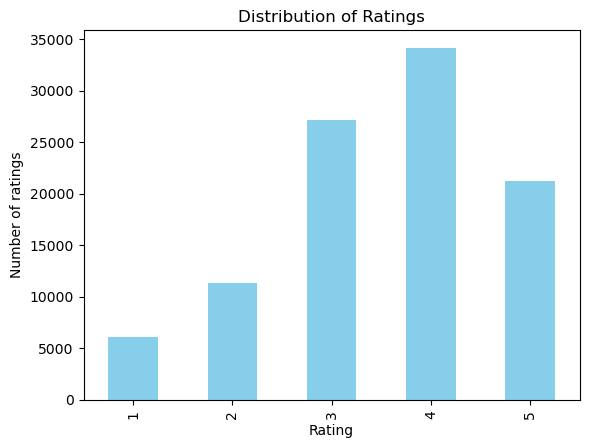

In [4]:
rating_counts = ratings["rating"].value_counts().sort_index()

rating_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Rating")
plt.ylabel("Number of ratings")
plt.title("Distribution of Ratings")
plt.show()

In [5]:
movie_rating = ratings.groupby("item_id").size().reset_index(name="rating")
top_10 = movie_rating.sort_values("rating", ascending=False).head(10)
top_10_with_title = pd.merge(top_10, items, left_on="item_id", right_on="movie_id")

print(top_10_with_title[["movie_title", "rating"]])

                     movie_title  rating
0               Star Wars (1977)     583
1                 Contact (1997)     509
2                   Fargo (1996)     508
3      Return of the Jedi (1983)     507
4               Liar Liar (1997)     485
5    English Patient, The (1996)     481
6                  Scream (1996)     478
7               Toy Story (1995)     452
8           Air Force One (1997)     431
9  Independence Day (ID4) (1996)     429


## Users

In [6]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


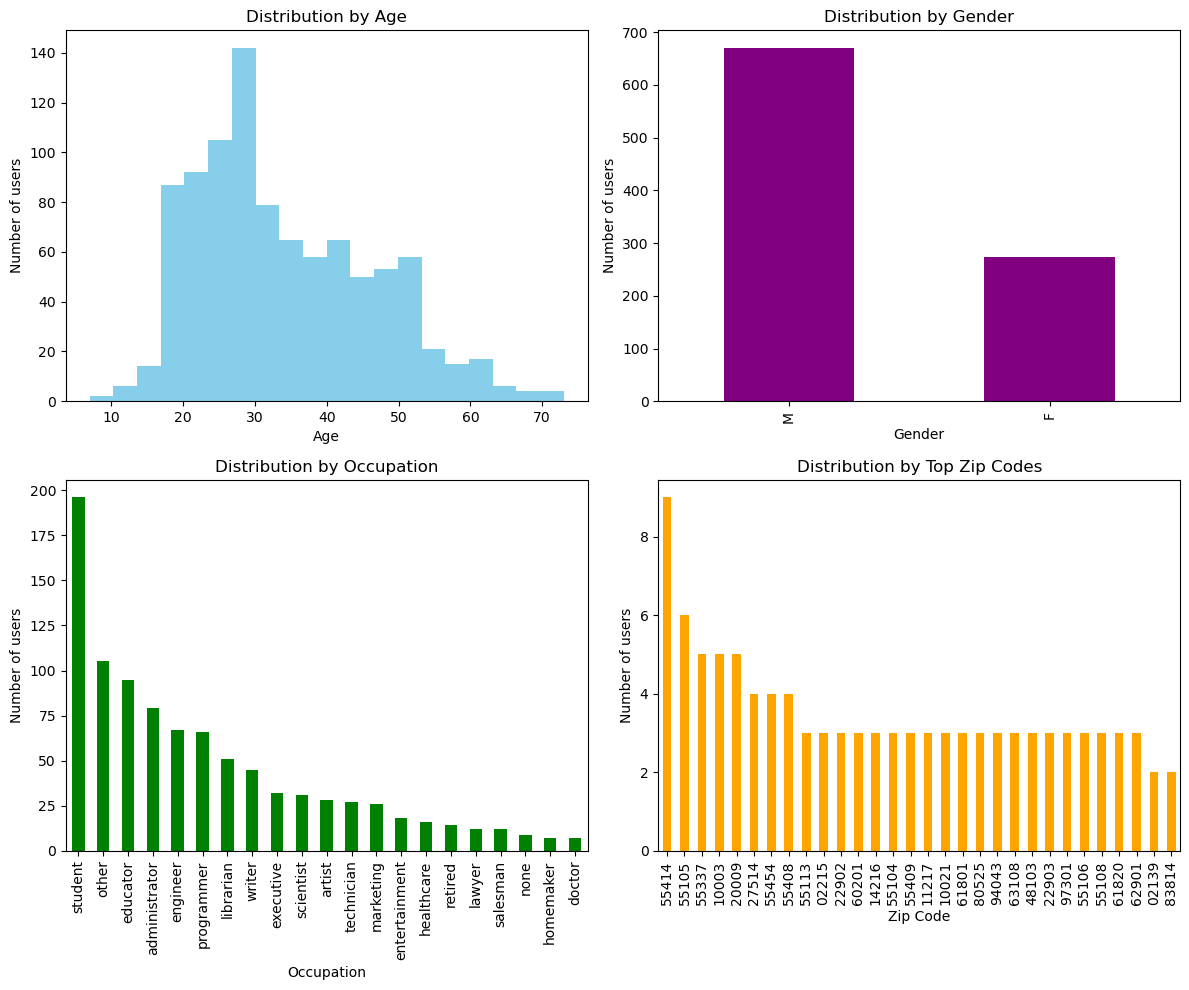

In [7]:
top_zip_codes = users["zip_code"].value_counts().head(30)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(users["age"], bins=20, color="skyblue")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Number of users")
axes[0, 0].set_title("Distribution by Age")

users["gender"].value_counts().plot(kind="bar", color="purple", ax=axes[0, 1])
axes[0, 1].set_xlabel("Gender")
axes[0, 1].set_ylabel("Number of users")
axes[0, 1].set_title("Distribution by Gender")

users["occupation"].value_counts().plot(kind="bar", color="green", ax=axes[1, 0])
axes[1, 0].set_xlabel("Occupation")
axes[1, 0].set_ylabel("Number of users")
axes[1, 0].set_title("Distribution by Occupation")

top_zip_codes.plot(kind="bar", color="orange", ax=axes[1, 1])
axes[1, 1].set_xlabel("Zip Code")
axes[1, 1].set_ylabel("Number of users")
axes[1, 1].set_title("Distribution by Top Zip Codes")

plt.tight_layout()
plt.show()

## Genres

In [8]:
genres.head()

,name,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


## Items

In [9]:
items.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


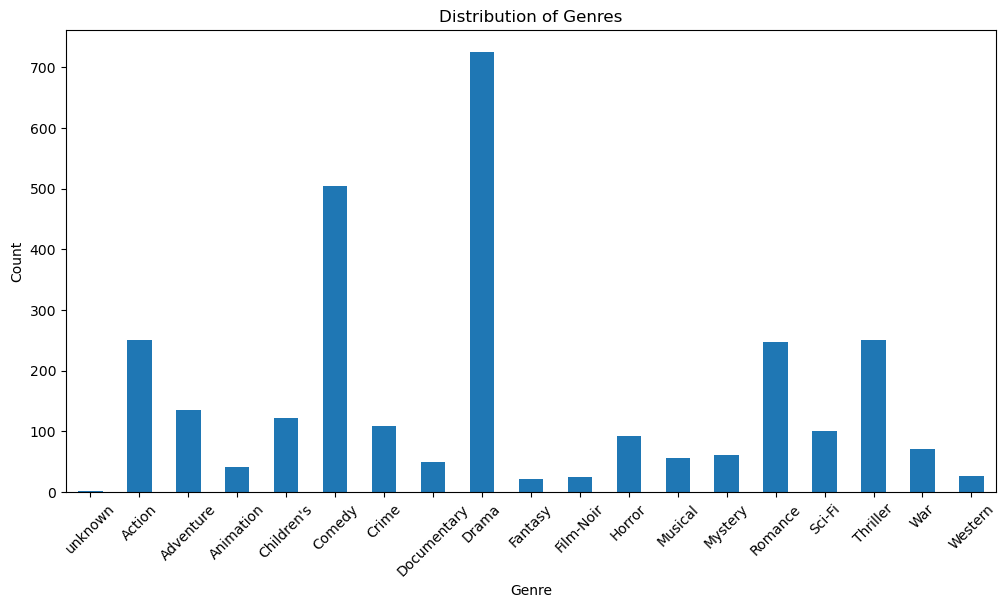

In [10]:
genre_counts = items.iloc[:, 5:].sum()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45)
plt.show()

# Preprocessing

## Users

In [11]:
users = pd.get_dummies(users, columns=["gender"], prefix=[""], prefix_sep="")
users = pd.get_dummies(users, columns=["occupation"], prefix="occupation")

users

,user_id,age,zip_code,F,M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,85711,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,94043,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,23,32067,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,43537,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,15213,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,26,33319,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
939,940,32,02215,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,941,20,97229,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
941,942,48,78209,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Items

In [12]:
def clear_date(date):
    if pd.isnull(date):
        return None
    return int(date.split("-")[-1])

In [13]:
items["release_date"] = items["release_date"].apply(lambda x: clear_date(x))

In [14]:
items.video_release_date.unique()

array([nan])

In [15]:
del items["video_release_date"]
del items["imdb_url"]

## Ratings

In [16]:
del ratings["timestamp"]

# Save preprocessed data

In [17]:
users.to_csv("../data/interim/users.csv", index=False)
items.to_csv("../data/interim/items.csv", index=False)
ratings.to_csv("../data/interim/ratings.csv", index=False)